In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 6.3 The Multivariate Normal - Conditioning

## Objectives

+ To demonstrate conditioning of a multivariate normal.

## The multivariate mormal - Conditioning

Consider the $N$-dimensional multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$
where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
Assume that $\boldsymbol{\mu}$ can be decomposed in two blocks of dimensions $N_1$ and $N_2$ ($N_1 + N_2 = N$):
$$
\boldsymbol{\mu} =
\begin{pmatrix}
\boldsymbol{\mu}_1\\
\boldsymbol{\mu}_2
\end{pmatrix}.
$$
Similarly for $\boldsymbol{\Sigma}$:
$$
\boldsymbol{\Sigma} = \begin{pmatrix}
\boldsymbol{\Sigma}_1 & \boldsymbol{\Sigma}_{12}\\
\boldsymbol{\Sigma}_{12}^T&\boldsymbol{\Sigma}_2
\end{pmatrix},
$$
where $\boldsymbol{\Sigma}_{ii}$ are $N_i\times N_i$ matrices, and $\boldsymbol{\Sigma}_{12}$ is a $N_1\times N_2$ matrix.
In lecture, we saw that when you observe that $\mathbf{X}_2 = \mathbf{x}_2$, then $\mathbf{X}_1$ is distributed according to:
$$
\mathbf{X}_1|\mathbf{X}_2 = \mathbf{x}_2\sim N(\boldsymbol{\mu}_1+\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_2^{-1}(\mathbf{x}_2-\boldsymbol{\mu}_2), \boldsymbol{\Sigma}_1-\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_2^{-1}\boldsymbol{\Sigma}_{12}^T).
$$
Let's demonstrate this first for the case $N=2$ and $N_1=N_2=1$.

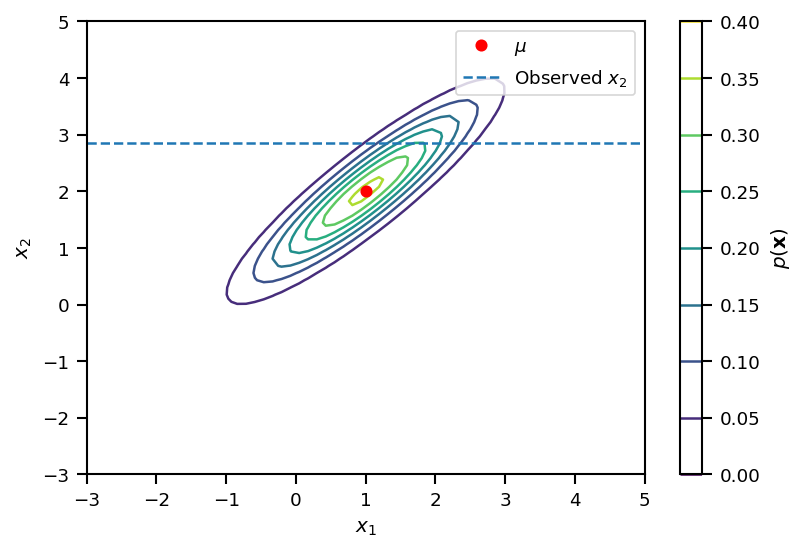

In [16]:
import scipy.stats as st
# The mean vector
mu = [1.0, 2.0]
# The covariance matrix
Sigma = np.array([[1.0, 0.9],
                   [0.9, 1.0]])
# The multivariate normal random vector
X = st.multivariate_normal(mean=mu, cov=Sigma)

# Let's say that we observe the x2 component of a sample of X
x_sample = X.rvs()
# The x2 component is observed
x2_observed = x_sample[1]
# The x1 component is hidden
x1_hidden = x_sample[0]

# Let's plot the contour of the joint and see where $x2$ falls
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
Xg1, Xg2 = np.meshgrid(x1, x2)
# Flattened values of grid points
Xg_flat = np.hstack([Xg1.flatten()[:, None], Xg2.flatten()[:, None]])
# PDF values
pdf_Xg = X.pdf(Xg_flat).reshape(Xg1.shape)
# Plot contours
c = ax.contour(Xg1, Xg2, pdf_Xg)
plt.colorbar(c, label='$p(\mathbf{x})$')

# SAMPLES
num_samples = 500
# Plot the mean
ax.plot(X.mean[0], X.mean[1], 'ro', label='$\mu$')
# Plot the observed x2 as a line
ax.plot(x1, [x2_observed] * np.ones(x1.shape[0]), '--', label='Observed $x_2$')
plt.legend(loc='best')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

So, intuitively, conditioned on known $X_2 = x_2$ the values of $X_1$ must have higher probability in the intersection of the dashed line with the contours of the joint.
Let's see what is the answer we get from the theory.

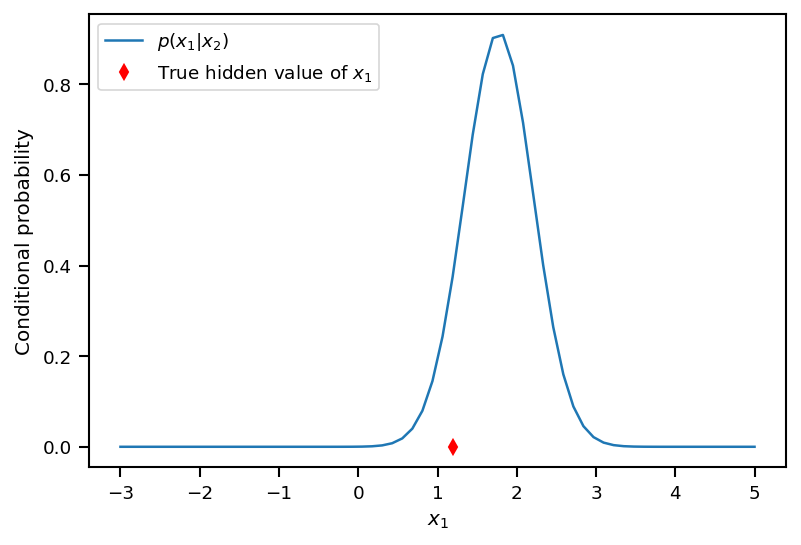

In [17]:
# We need to extract some info from the covariance matrix
Sigma11 = Sigma[0, 0]
Sigma12 = Sigma[0, 1]
Sigma22 = Sigma[1,1]
# In the general case (N1, N2 != 1), these would have been matrices.
# Here it is a bit easier because they are all scalars.
# Let's do the same for the mean vector
mu1 = mu[0]
mu2 = mu[1]
# Let's find the conditioned mean:
mu1_cond = mu1 + Sigma12 * (x2_observed - mu2) / Sigma22
# Let's find the conditioed variance:
Sigma11_cond = Sigma11 - Sigma12 ** 2 / Sigma22
# Let's plot the pdf of this along with the hidden (unobserved) value of x1 which is known in this toy example:
X1_cond = st.norm(loc=mu1_cond, scale=np.sqrt(Sigma11_cond))
fig, ax = plt.subplots(dpi=150)
ax.plot(x1, X1_cond.pdf(x1), label='$p(x_1|x_2)$')
ax.plot([x1_hidden], [0], 'rd', label='True hidden value of $x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('Conditional probability')
plt.legend(loc='best');

## Questions

+ Rerun the code above multiple times to see how the conditinal PDF moves around as other points are picked randomly.
+ Modify the code so that you get the conditional PDF of $X_2$ given $X_1=x_1$.

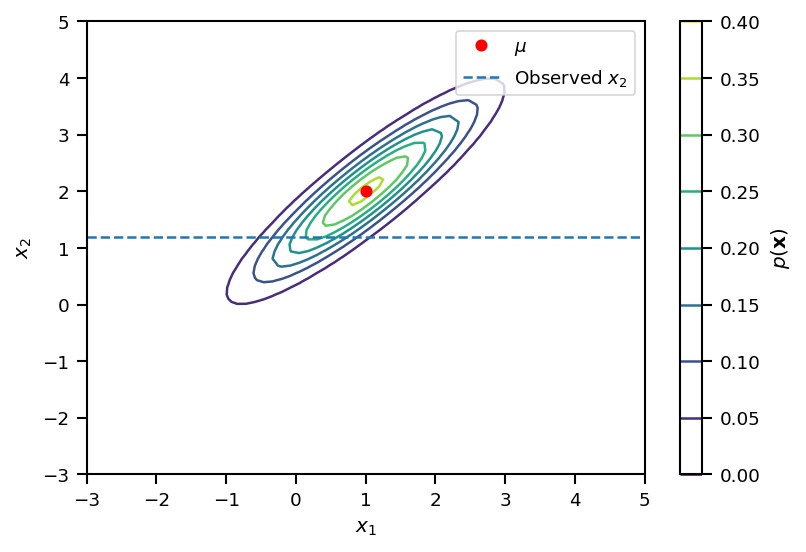

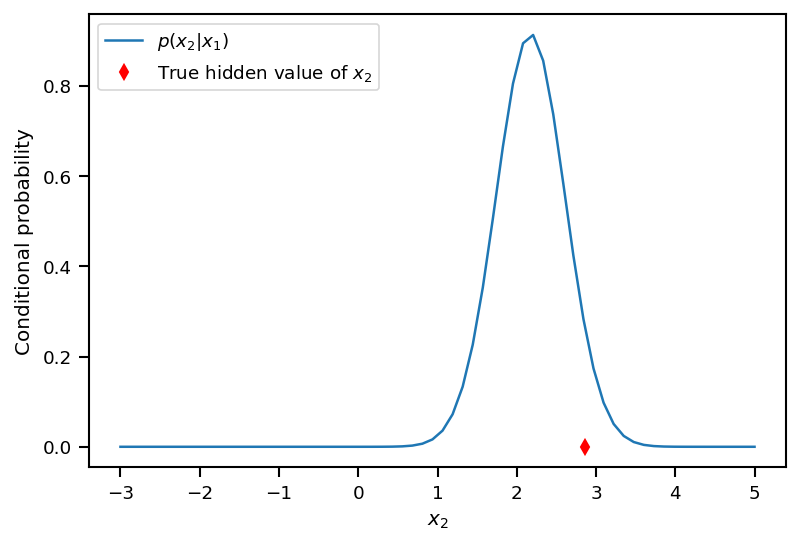

In [19]:
x1_observed = x_sample[0]
# The x1 component is hidden
x2_hidden = x_sample[1]

# Let's plot the contour of the joint and see where $x2$ falls
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
Xg1, Xg2 = np.meshgrid(x1, x2)
# Flattened values of grid points
Xg_flat = np.hstack([Xg1.flatten()[:, None], Xg2.flatten()[:, None]])
# PDF values
pdf_Xg = X.pdf(Xg_flat).reshape(Xg1.shape)
# Plot contours
c = ax.contour(Xg1, Xg2, pdf_Xg)
plt.colorbar(c, label='$p(\mathbf{x})$')

# SAMPLES
num_samples = 500
# Plot the mean
ax.plot(X.mean[0], X.mean[1], 'ro', label='$\mu$')
# Plot the observed x2 as a line
ax.plot(x2, [x1_observed] * np.ones(x2.shape[0]), '--', label='Observed $x_2$')
plt.legend(loc='best')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Sigma11 = Sigma[0, 0]
Sigma12 = Sigma[0, 1]
Sigma22 = Sigma[1,1]
# In the general case (N1, N2 != 1), these would have been matrices.
# Here it is a bit easier because they are all scalars.
# Let's do the same for the mean vector
mu1 = mu[0]
mu2 = mu[1]
# Let's find the conditioned mean:
mu2_cond = mu2 + Sigma12 * (x1_observed - mu1) / Sigma11
# Let's find the conditioed variance:
Sigma22_cond = Sigma22 - Sigma12 ** 2 / Sigma11
# Let's plot the pdf of this along with the hidden (unobserved) value of x1 which is known in this toy example:
X2_cond = st.norm(loc=mu2_cond, scale=np.sqrt(Sigma22_cond))
fig, ax = plt.subplots(dpi=150)
ax.plot(x2, X2_cond.pdf(x2), label='$p(x_2|x_1)$')
ax.plot([x2_hidden], [0], 'rd', label='True hidden value of $x_2$')
ax.set_xlabel('$x_2$')
ax.set_ylabel('Conditional probability')
plt.legend(loc='best');